<a href="https://colab.research.google.com/github/zcrennen/handwrittenDigitClassification/blob/main/handwrittenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Handwritten Digit Classifier

 This is a basic program that will classify images of handwritten digits. This project is considered the "hello world" of neural networks. The images are simple black and white, 28x28 images of handwritten digits. They will be classified 0-9. The intent of this is to get familiar with basic tensorflow, and then further develop this model by using handwritten letters.

We first need to import some dependencies

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Here we are loading in our data. This is split into 4 types, our x and y data, as well as training and testing data. This can be conveniently imported from one line using keras

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Let's check the size of our data to verify it has loaded in properly

In [ ]:
print(len(X_train))
print(len(X_test))

60000
10000


Perfect! Looks like we have plenty of data to use. Let's try to understand the data a little more.

In [ ]:
X_train[0].shape

(28, 28)

The image is represented by a 2 dimensional array of size 28x28. Each pixel is represented by a number 0-255, 0 representing black and 255 representing white

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Above we can see one of the images in its raw form. Although this is what the computer sees, it is a little hard for us to understand. Let's try plotting this to make it a little more clear

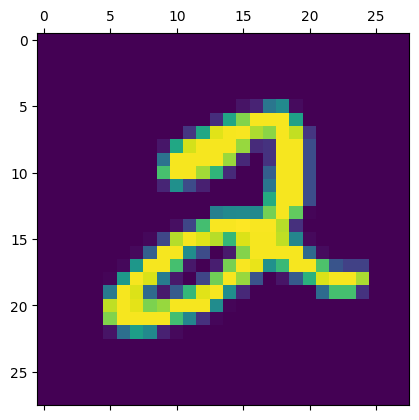

In [ ]:
plt.matshow(X_train[5])

Perfect. Looks like a number 2. Let's double check this in the dataset by looking at the answer key

In [ ]:
y_train[5]

2

Our image is stored in a 2 dimensional array. However, to make the math work, we want a 1 dimensional array. We will flatten the array to convert it from a 28x28 array to a 784x1 array. Now, it will just be one long array of all of the pixel values. The first dimension will remain the same, as the number of examples in both datasets is the same. But for the flattened dataset, we will only specify one dimension, which is the rows * columns. This will be stored as a new dataset, and we will confirm its shape.

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

Let's repeat this same process for the testing data as well

In [ ]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

We want these values to be between 0 and 1, instead of 0 and 255. So, we can scale the data by dividing each value by 255. This will help increase our accuracy when we are training the model

In [ ]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

Let's look at the raw array again to verify that this is now a single dimension, flattened array

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Perfect, now it is a single dimension array. We can now start building the neural net. This will be a simple neural net. On the input layer, there will be 784 nodes, representing the value from each pixel. On the output layer, we will have 10 nodes, representing the numbers 0-9, our targets.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

We use a Dense layer, because all of the input nodes connect directly to all of the output nodes. The first parameter is 10, because we have 10 output nodes. The second parameter is 784, because we have 784 input nodes. We are using the sigmoid activation function. This takes each number 0-255, and reduces it to a number between 0 and 1. Now, we need to compile the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Calls the training of the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4673 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9255


The optimizer allows for more efficient training. The loss function helps the model classify our predictions into the 10 categories. The metrics parameter specifies what we are trying to increase in the model. We fit the model to our training data, and train on 5 epochs.
## NEED TO RESEARCH THESE AND FIND OUT WHAT THEY DO

Our model is now compiled and fit! We can see that the loss and accuracy is calculated for each epoch. Our final accuracy is about 92%. This accuracy only reflects the training dataset, so now we need to look at the testing dataset.


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2675 - accuracy: 0.9255


[0.26750648021698, 0.9254999756813049]

The neural network is complete! Let's visualize it and see how it's actually doing. The first example here is a 7

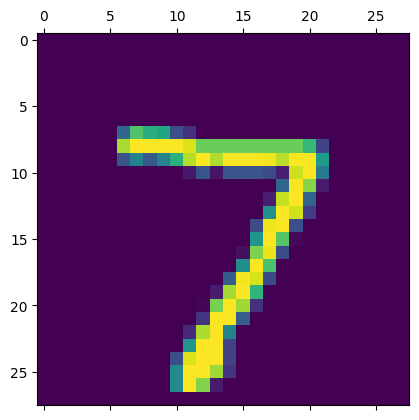

In [ ]:
plt.matshow(X_test[0])

The variable y_hats will store all of the predictions on the testing dataset.

In [ ]:
y_hats = model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_hats[0]

array([2.2128448e-02, 6.2870566e-07, 5.3987533e-02, 9.6528584e-01,
       3.4420912e-03, 1.0679342e-01, 1.7286575e-06, 9.9975193e-01,
       8.3855249e-02, 6.8034846e-01], dtype=float32)

This answer doesn't look like 7, but is instead an array of 10 values. This is because it is outputting the probabilities for each of the output nodes. So, to find our actual predicted number, we will take the maximum from this array

In [ ]:
np.argmax(y_hats[0])

7

We can see that the model correctly predicted this is a 7. We need to apply this to all of our results now and save it.

In [ ]:
y_hat_labels = [np.argmax(i) for i in y_hats]
y_hat_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

We can see that our first 5 predictions correctly match with the actual first 5 values. Let's build a confusion matrix to further understand our results.

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_hat_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,    9,    3,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   3,    9,  919,   19,    7,    4,   14,   11,   43,    3],
       [   1,    0,   14,  932,    0,   17,    4,   12,   25,    5],
       [   1,    1,    2,    1,  918,    0,   14,    4,   10,   31],
       [   9,    3,    2,   45,    9,  757,   18,    7,   36,    6],
       [   8,    3,    3,    1,    7,   10,  920,    2,    4,    0],
       [   1,    5,   20,    8,    7,    0,    0,  946,    5,   36],
       [   6,    6,    6,   24,    9,   18,   10,   11,  879,    5],
       [  10,    7,    1,   13,   29,    6,    0,   18,    6,  919]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

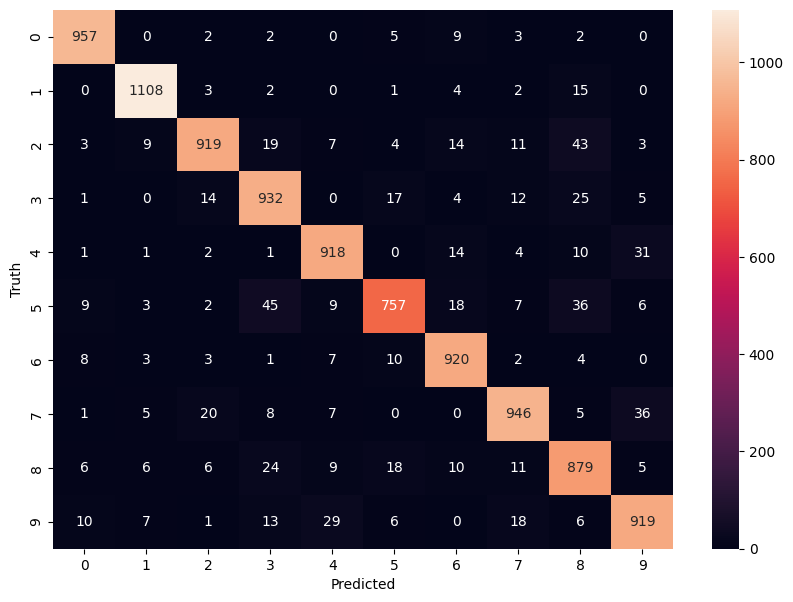

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

This matrix reprsents how many times each number was predicted vs the times it was correct. Basically, values along the diagonal are good, and values not on the diagonal are bad. We can see that overall the model is pretty good at correctly predicting the numbers.

Let's try adding a hidden layer to see if it can increase our accuracy. The first layer now converts from 784 nodes to 100 nodes. The number 100 is arbitrary, and up for experimentation. We no longer need to specify the input shape in the second layer, as it knws what is is from the first layer. Let's also try using the relu activation function.

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Calls the training of the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2790 - accuracy: 0.9197
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1243 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0857 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0649 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9845


The hidden layer increased the accuracy to 97%! This is great, but notice that it took significantly longer to train. Let's evaluate again.

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0788 - accuracy: 0.9761


[0.07884768396615982, 0.9761000275611877]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

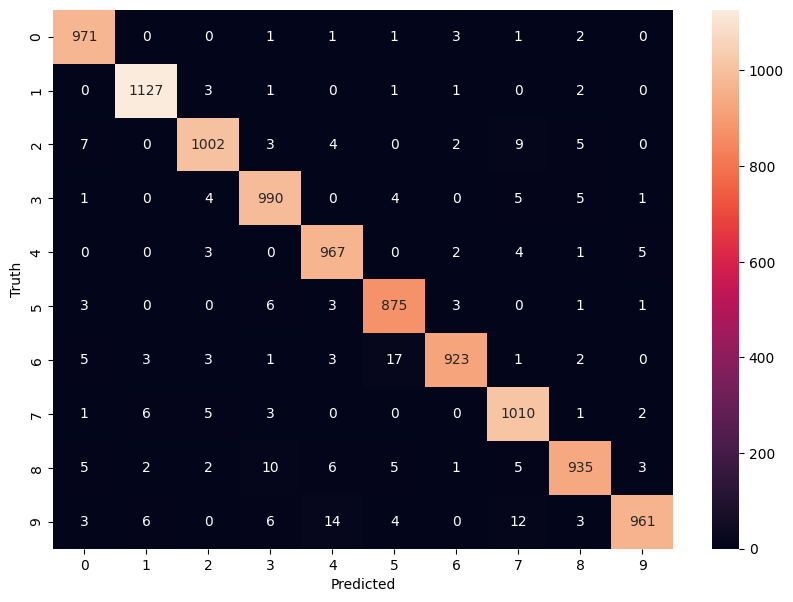

In [ ]:
y_hats = model.predict(X_test_flattened)
y_hat_labels = [np.argmax(i) for i in y_hats]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_hat_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Let's take advantage of the fact that keras can flatten our data for us. If we add a flattening layer and specify the input shape, Keras will handle it for us.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Calls the training of the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.6994 - accuracy: 0.8441
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4179 - accuracy: 0.8968
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3059 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2601 - accuracy: 0.9328
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2355 - accuracy: 0.9386
